In [1]:
import sys
sys.path.insert(1, '/Users/brian/crypto/crocket')

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mtick
from json import load as json_load

from crocket.bittrex.bittrex import Bittrex
from crocket.utilities.passcode import AESCipher
from crocket.sql.sql import Database

In [3]:
CREDENTIALS_FILE_PATH = '/Users/brian/crypto/.credentials.json'
ENCRYPTED_FAKE_KEY = 'kS9fYyw94g7sWI/7L0pVi91ZFeiitH4Rk54vacZWwLvi6Nxoe64zUVMWjELor0th'

HOSTNAME = '173.255.241.200'
DATABASE_NAME = 'BITTREX'

# Decrypt the fake key to get the real key
fake_cipher = AESCipher('passcode')

real_key = fake_cipher.decrypt(ENCRYPTED_FAKE_KEY.encode())

cipher = AESCipher(real_key)

# Load credentials
with open(CREDENTIALS_FILE_PATH, 'r') as f:
    credentials = json_load(f)

USERNAME = cipher.decrypt(credentials.get('username').encode())
PASSCODE = cipher.decrypt(credentials.get('passcode').encode())

In [4]:
# Create database object

db = Database(hostname=HOSTNAME,
              username=USERNAME,
              password=PASSCODE,
              database_name=DATABASE_NAME)

In [5]:
# TODO: Fix slow query time
data = db.select_query('BTC-ZEC', '*') # `BTC-GCR` # TODO: Fix false positives in `BTC-BRX` (consecutive time points)
time, price, basevolume, volume, buyorder, sellorder = map(list, zip(*data))

In [7]:
print(data[0])
print(data[1440])

(datetime.datetime(2017, 9, 24, 17, 16, 18), Decimal('0.05571294'), 516.739, 9373.99, 1302, 7204)
(datetime.datetime(2017, 9, 25, 17, 23, 23), Decimal('0.05939999'), 708.559, 12127.9, 1411, 6970)


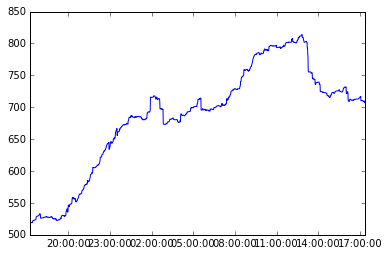

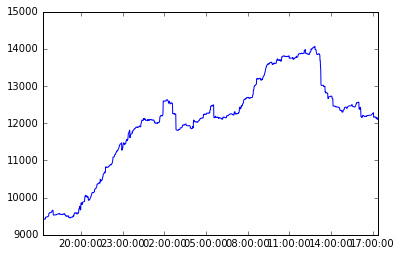

In [13]:
plt.plot(time[0:1440], basevolume[0:1440])
plt.show()

plt.plot(time[0:1440], volume[0:1440])

plt.show()

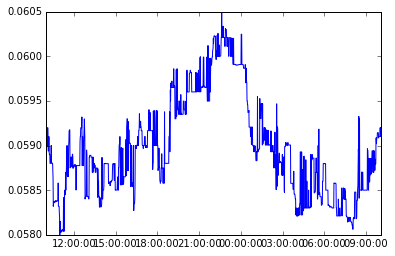

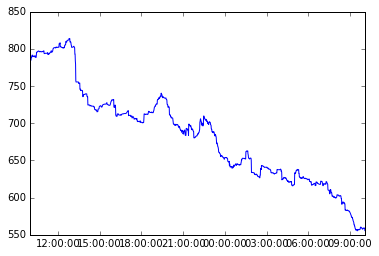

In [18]:
start = 1000
stop = start + 1440

plt.plot(time[start:stop], price[start:stop])
plt.show()

plt.plot(time[start:stop], basevolume[start:stop])
plt.show()

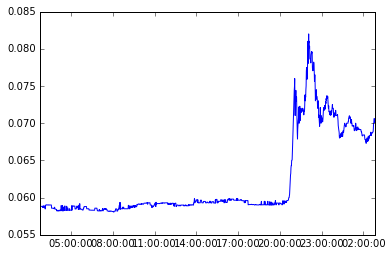

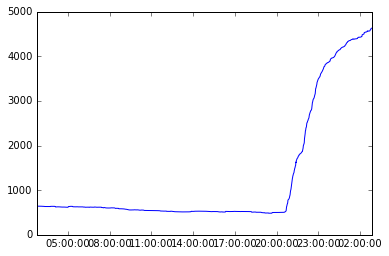

In [19]:
start = 2000
stop = start + 1440

plt.plot(time[start:stop], price[start:stop])
plt.show()

plt.plot(time[start:stop], basevolume[start:stop])
plt.show()